In [14]:
import pandas as pd
import numpy as np
from keras import layers, optimizers, models, datasets, callbacks
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report

## Carico Dataset

In [15]:
mnist = datasets.mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

5


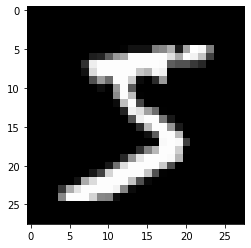

In [16]:
plt.imshow(X_train[0], cmap = "gray")
print(y_train[0])

## Reshape e normalizzazione

In [17]:
IMG_SIZE = 28
X_train = X_train.reshape(-1, IMG_SIZE,IMG_SIZE, 1)
X_train = X_train/255.0

X_test = X_test.reshape(-1, IMG_SIZE, IMG_SIZE, 1)
X_test = X_test/255.0

## Rete neurale

In [24]:
# Creazione del modello

model = models.Sequential()

model.add(layers.Conv2D(32, (3,3), input_shape = (IMG_SIZE, IMG_SIZE, 1), activation = "relu"))
model.add(layers.MaxPool2D(pool_size = (2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(10, activation = "softmax"))

In [25]:
model.summary() #Descrizione del modello creato

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [26]:
# Compilazione del modello

model.compile(loss = "sparse_categorical_crossentropy", # loss apposita per problemi di classificazione
              optimizer = optimizers.adam(),
              metrics = ["acc"])

In [28]:
history = model.fit(X_train, y_train, 
          batch_size = 128, 
          epochs = 2, 
          validation_split = 0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/2
42000/42000 [==============================] - 9s 218us/step - loss: 0.2814 - acc: 0.9203 - val_loss: 0.1273 - val_acc: 0.9622
Epoch 2/2
42000/42000 [==============================] - 9s 220us/step - loss: 0.0886 - acc: 0.9734 - val_loss: 0.0770 - val_acc: 0.9775


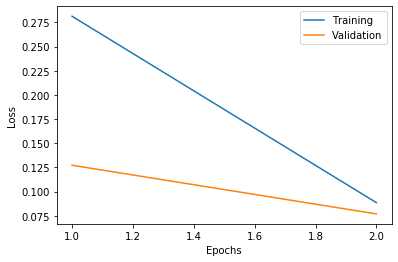

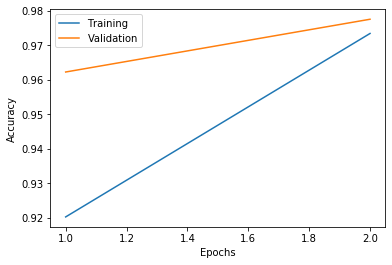

In [29]:
# Grafici per il loss score e per l'accuracy, non è presente overfitting

x_plot = list(range(1,history.epoch[-1]+2))

def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(x_plot, network_history.history['loss'])
    plt.plot(x_plot, network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(x_plot, network_history.history['acc'])
    plt.plot(x_plot, network_history.history['val_acc'])
    plt.legend(['Training', 'Validation'])

    
plot_history(history)

In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("TEST LOSS:", test_loss)
print("TEST ACCURACY:", test_acc)

10000/10000 [==============================] - 1s 82us/step
TEST LOSS: 0.07098520266599953
TEST ACCURACY: 0.9779999852180481


### I risultati della rete sul test set sono molto soddisfacenti